# 1. BigQuery

In [1]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

## 1.1. BigQuery 테이블 로드

In [2]:
%load_ext google.cloud.bigquery

### 1.1.1. 조회만 하기

- 본인이 생성했던 데이터베이스(bigquery_test_db)로부터 테이블(kc_house_data) 조회하기

In [3]:
%%bigquery
SELECT *
FROM `bigquery_test_db.kc_house_data` 
LIMIT 5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
2,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
3,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


### 1.1.2. 쿼리 결과 저장

- 본인이 생성했던 데이터베이스(bigquery_test_db)로부터 테이블(kc_house_data) 조회하기
- 쿼리의 결과를 변수로 저장 => %%bigquery [변수명]

In [4]:
%%bigquery tmp 
SELECT *
FROM `bigquery_test_db.kc_house_data` 

In [5]:
tmp.shape

(21613, 21)

In [6]:
tmp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
2,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
3,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


## 1.2. Pandas Data Frame으로 불러오기

- client.query(`'sql문'`).to_dataframe()

In [7]:
client = bigquery.Client()

In [8]:
sql = """
SELECT *
FROM `bigquery_test_db.kc_house_data`
"""
df = client.query(sql).to_dataframe()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
2,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
3,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


In [9]:
df.shape

(21613, 21)

# 2. SQL 예제

## 2.1. CREATE, INSERT, DELETE, DROP

### 1) CREATE - 테이블 생성

In [10]:
%%bigquery
CREATE TABLE `bigquery_test_db.instructor`(
    `student_ID` STRING,
    `name` STRING,
    `age` NUMERIC,
    `dept_name` STRING
);

""


### 2) INSERT - 테이블에 행 추가

- 행 하나만 넣기

In [11]:
%%bigquery
INSERT into `bigquery_test_db.instructor` values ('1', 'mj', 23, 'Statistics');

""


In [12]:
%%bigquery
SELECT * FROM `bigquery_test_db.instructor`;

,student_ID,name,age,dept_name
0,1,mj,23,Statistics


- 행 여러개 넣기

In [13]:
%%bigquery
INSERT into `bigquery_test_db.instructor` values ('2', 'jh', 26, 'Statistics');
INSERT into `bigquery_test_db.instructor` values ('3', 'hg', 22, 'Statistics');

""


In [14]:
%%bigquery
SELECT * FROM `bigquery_test_db.instructor`;

,student_ID,name,age,dept_name
0,1,mj,23,Statistics
1,3,hg,22,Statistics
2,2,jh,26,Statistics


### 3) DELETE - 테이블에서 행 제거
- 만약 DELETE문에 WHERE절을 사용하지 않을 경우 테이블에 있는 모든 행이 삭제되므로 주의
- 특정 행을 지우고자 한다면 where 쓸 것 (BigQuery에서는 where 안쓰면 에러남)

student_ID가 '3'인 행 제거

In [15]:
%%bigquery
DELETE FROM `bigquery_test_db.instructor`
WHERE student_ID = '3';

""


In [16]:
%%bigquery
SELECT * FROM `bigquery_test_db.instructor`;

,student_ID,name,age,dept_name
0,2,jh,26,Statistics
1,1,mj,23,Statistics


### 4) DROP - 테이블 삭제

In [17]:
%%bigquery
DROP TABLE `bigquery_test_db.instructor`

""


## 2.2. SELECT

- 데이터를 처리하기 위해 가장 많이 쓰는 명령어
- 기본적으로 `SELECT [컬럼] FROM [테이블명]`의 구조를 가짐
- BigQuery에서는 FROM 뒤에 오는 테이블명은 반드시 `데이터세트명.테이블명`으로 작성해야함

### 1) 가장 기본적인 쿼리 구조

- [bigquery_test_db.employees]에서 [*모든 컬럼]을 행 3개까지만 뽑아라
- __(LIMIT은 마치 pandas의 head()같은 기능으로 전처리하거나 데이터 전체를 가져올 땐 잘 사용하지 않지만 실습에서 조금씩만 조회하기 위해 사용)__

In [18]:
%%bigquery
SELECT * 
FROM bigquery_test_db.employees
LIMIT 3

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,11846,1954-04-24,Fai,Perly,F,1993-11-21
1,12018,1956-12-23,Fai,Morton,F,1990-07-23
2,12095,1953-05-24,Fai,Smeets,F,1990-04-04


- 컬럼명을 본인이 원하는 대로 바꿔서 불러오고 싶다면 `as`사용

In [19]:
%%bigquery
SELECT emp_no as id
FROM bigquery_test_db.employees
LIMIT 3

,id
0,11846
1,12018
2,12095


### 2) WHERE

- [bigquery_test_db.employees]에서 [gender]가 F인 행들의 [*모든 컬럼]을 뽑아라

In [20]:
%%bigquery
SELECT * 
FROM bigquery_test_db.employees
WHERE gender = 'F'
LIMIT 3

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,11846,1954-04-24,Fai,Perly,F,1993-11-21
1,12018,1956-12-23,Fai,Morton,F,1990-07-23
2,12095,1953-05-24,Fai,Smeets,F,1990-04-04


#### (1) and (or)


[bigquery_test_db.employees]에서 [gender]가 F이고 [emp_no]이 11846인 행들의 [*모든 컬럼]을 뽑아라

In [21]:
%%bigquery
SELECT * 
FROM bigquery_test_db.employees
WHERE gender = 'F' and emp_no = 11846

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,11846,1954-04-24,Fai,Perly,F,1993-11-21


#### (2) between


[bigquery_test_db.employees]에서 [hire_date]가 '1990-01-01'과 '1990-06-30'사이인 행들의 [*모든 컬럼]을 뽑아라

In [22]:
%%bigquery
SELECT *
FROM bigquery_test_db.employees
WHERE hire_date between '1990-01-01' and '1990-06-30'
LIMIT 5;

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,12095,1953-05-24,Fai,Smeets,F,1990-04-04
1,49961,1962-01-11,Fai,Comellas,F,1990-05-27
2,93249,1960-02-29,Fai,Radwan,F,1990-02-21
3,219745,1956-08-04,Fai,Merel,F,1990-03-22
4,236215,1959-06-19,Fai,Herber,F,1990-04-19


### 3) DISTINCT

- SQL은 쿼리를 실행할 때 중복을 허용한다
- 유니크한 값을 뽑기 위해서 distinct를 쓴다

In [23]:
%%bigquery
SELECT DISTINCT gender
FROM bigquery_test_db.employees;

,gender
0,F
1,M


### 4) String Operation

- [last_name] 에 'mee'가 들어가는 행 찾기

In [24]:
%%bigquery
SELECT *
FROM bigquery_test_db.employees
WHERE last_name like '%mee%'
LIMIT 5;

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,12095,1953-05-24,Fai,Smeets,F,1990-04-04
1,73625,1953-01-27,Fan,Smeets,F,1987-04-19
2,67916,1957-06-12,Goa,Smeets,F,1986-05-19
3,102364,1956-06-10,Adil,Smeets,F,1985-11-30
4,56092,1957-09-21,Adin,Smeets,F,1988-10-10


### 5) ORDER BY

- birth_date 먼저 정렬하고 그다음 hire_date 순으로 정렬
- default는 오름차순

In [25]:
%%bigquery
SELECT *
FROM bigquery_test_db.employees
ORDER BY birth_date, hire_date
LIMIT 5;

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,65308,1952-02-01,Jouni,Pocchiola,M,1985-03-10
1,87461,1952-02-01,Moni,Decaestecker,M,1986-10-06
2,237571,1952-02-01,Ronghao,Schaad,M,1988-07-10
3,207658,1952-02-01,Kiyokazu,Whitcomb,M,1988-07-26
4,406121,1952-02-01,Supot,Remmele,M,1989-01-27


- 내림차순으로 정렬하고 싶은 컬럼 옆에 DESC 써주기
- birth_date는 오름차순으로, hire_date는 내림차순으로 정렬된 것 확인할 수 있음

In [26]:
%%bigquery
SELECT *
FROM bigquery_test_db.employees
ORDER BY birth_date, hire_date DESC
LIMIT 5;

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,91374,1952-02-01,Eishiro,Kuzuoka,M,1992-02-12
1,406121,1952-02-01,Supot,Remmele,M,1989-01-27
2,207658,1952-02-01,Kiyokazu,Whitcomb,M,1988-07-26
3,237571,1952-02-01,Ronghao,Schaad,M,1988-07-10
4,87461,1952-02-01,Moni,Decaestecker,M,1986-10-06


### 6) 집계함수

#### 1) Count
- SQL은 카운트할 때 중복을 허용한다
- 유니크한 값을 카운트하기 위해서 distinct를 쓴다

In [27]:
%%bigquery
SELECT COUNT(gender) 
FROM bigquery_test_db.employees;

,f0_
0,300024


- 만약 count 결과의 열 이름을 지정하고 싶다면 `as` 사용

In [28]:
%%bigquery
SELECT COUNT(gender) as cnt
FROM bigquery_test_db.employees;

,cnt
0,300024


- 유니크한 값을 카운트하기 위해서 distinct를 쓴다

In [29]:
%%bigquery
SELECT COUNT(DISTINCT gender) as cnt
FROM bigquery_test_db.employees;

,cnt
0,2


#### 2) avg, min, max, sum

[bigquery_test_db.salaries]에서 모든 행에 대해 [salary] 컬럼의 평균 구하기

In [30]:
%%bigquery
SELECT avg(salary) as avg_salary
FROM bigquery_test_db.salaries;

,avg_salary
0,52970.732451


=> min, max, sum도 마찬가지로 쓰면 됨

### 7) Join

- left, right, inner, outer 등 여러가지 종류가 있다
- default는 inner join
- 서로 연결되는 key가 있을 경우 결합 가능
- join 할 때 잘못붙이면 데이터가 뻥튀기 되는 경우 있으니 주의할 것
( 주의사항 참고 : https://gywn.net/2012/05/mysql-bad-sql-type/ )
- 아래의 구문을 보고 본인의 데이터에 맞게 변형해서 사용할 것

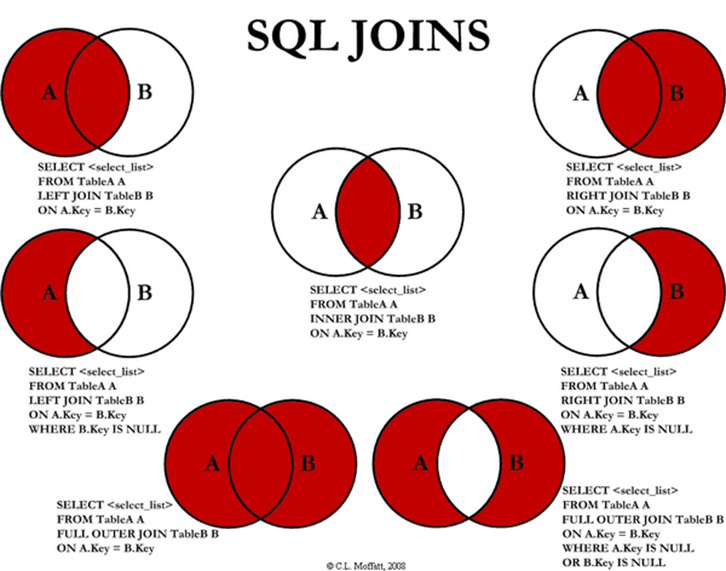

#### 실습에서는 left join만 사용해보겠다

- [employees]테이블에 [salaries]테이블의 정보를 'emp_no'을 기준으로 결합

In [31]:
%%bigquery
SELECT emp.*, sal.salary
FROM `bigquery_test_db.employees` as emp 
LEFT JOIN `bigquery_test_db.salaries` as sal 
    ON emp.emp_no = sal.emp_no;

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary
0,11846,1954-04-24,Fai,Perly,F,1993-11-21,53448
1,12018,1956-12-23,Fai,Morton,F,1990-07-23,46011
2,12095,1953-05-24,Fai,Smeets,F,1990-04-04,57978
3,13561,1962-04-30,Fai,Thebaut,F,1985-07-05,42629
4,18036,1958-11-23,Fai,Kowalchuk,F,1985-05-15,42539
5,20438,1955-03-17,Fai,Erman,F,1993-08-08,42141
6,25484,1962-12-23,Fai,Gruenwald,F,1991-06-11,64246
7,28799,1960-12-18,Fai,Avouris,F,1988-01-14,60263
8,30469,1963-02-26,Fai,Baek,F,1987-06-17,66303
9,36043,1952-12-12,Fai,Rubsam,F,1987-06-29,90719


※ 위와같이 테이블 여러개를 사용한다면 `as`를 사용해서 별칭을 정해준 후 사용할 수 있다

### 8) GROUP BY
- 그룹별로 집계함수 적용하기

- gender별 평균 salary를 구해라

In [32]:
%%bigquery
SELECT gender, avg(salary) as avg_salary_by_gender
FROM (
    SELECT emp.*, sal.salary
    FROM `bigquery_test_db.employees` as emp 
    LEFT JOIN `bigquery_test_db.salaries` as sal 
        ON emp.emp_no = sal.emp_no
)
GROUP BY gender;

,gender,avg_salary_by_gender
0,F,52953.836428
1,M,52982.002945


※ 위와 같이 FROM에 테이블명 대신 또 다른 SELECT 구문 사용할 수 있음

- gender별로 salary > 60000 인 유니크한 employee의 수를 구해라

In [33]:
%%bigquery
SELECT gender, COUNT(DISTINCT emp_no) as emp_cnt
FROM (
    SELECT emp.*, sal.salary
    FROM `bigquery_test_db.employees` as emp 
    LEFT JOIN `bigquery_test_db.salaries` as sal 
        ON emp.emp_no = sal.emp_no
)
WHERE salary > 60000
GROUP BY gender;

,gender,emp_cnt
0,F,33472
1,M,50163


### 9) HAVING
- GROUP BY로 그룹화 한 뒤에 조건을 걸어서 원하는 데이터 추출하는 명령어

- HAVING 사용 X : gender별로 유니크한 employee의 수를 구해라

In [34]:
%%bigquery
SELECT gender, COUNT(DISTINCT emp_no) as emp_cnt
FROM (
    SELECT emp.*, sal.salary
    FROM `bigquery_test_db.employees` as emp 
    LEFT JOIN `bigquery_test_db.salaries` as sal 
        ON emp.emp_no = sal.emp_no
)
GROUP BY gender;

,gender,emp_cnt
0,F,120051
1,M,179973


- HAVING 사용 O : gender별로 유니크한 employee의 수를 구한 뒤 그 수가 150000 이상인 경우만 뽑아라

In [35]:
%%bigquery
SELECT gender, COUNT(DISTINCT emp_no) as emp_cnt
FROM (
    SELECT emp.*, sal.salary
    FROM `bigquery_test_db.employees` as emp 
    LEFT JOIN `bigquery_test_db.salaries` as sal 
        ON emp.emp_no = sal.emp_no
)
GROUP BY gender
HAVING emp_cnt >= 150000;

,gender,emp_cnt
0,M,179973
